# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

city_data= []

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_info = {"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}
        city_data.append(city_info)

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | lagonoy
Processing Record 3 of Set 1 | maumere
Processing Record 4 of Set 1 | fort bragg
Processing Record 5 of Set 1 | mankera
Processing Record 6 of Set 1 | taiohae
'coord'
City not found. Skipping...
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | gadzhiyevo
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | al mahwit
Processing Record 14 of Set 1 | novyy turtkul'
Processing Record 15 of Set 1 | inari
Processing Record 16 of Set 1 | qarqaraly
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | bethel
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,279.61,76,100,2.68,NZ,1686848767
1,lagonoy,13.7342,123.5207,299.32,88,100,1.62,PH,1686848767
2,maumere,-8.6199,122.2111,297.06,79,100,1.98,ID,1686848767
3,fort bragg,35.1390,-79.0060,303.05,48,75,2.06,US,1686848672
4,mankera,31.3866,71.4407,311.49,28,51,5.14,PK,1686848768


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Text(0, 0.5, 'temperature')

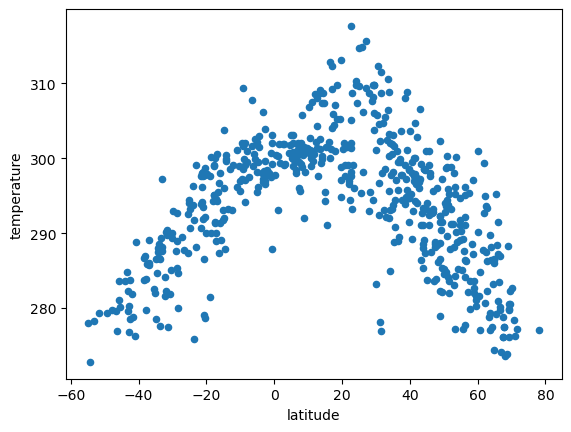

In [85]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.xlabel("latitude")
plt.ylabel("temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
#plt.show()

#### Latitude Vs. Humidity

Text(0, 0.5, 'humidity')

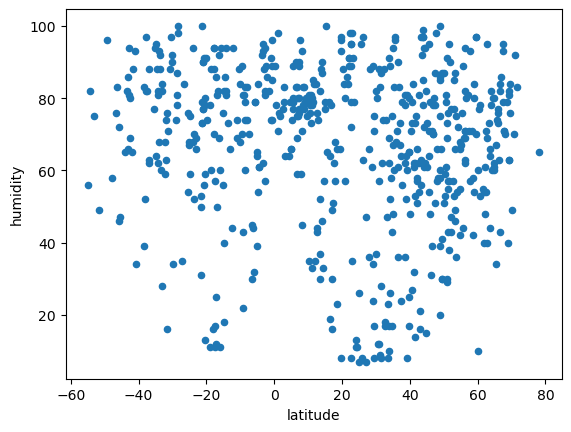

In [86]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.xlabel("latitude")
plt.ylabel("humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
#plt.show()

#### Latitude Vs. Cloudiness

Text(0, 0.5, 'cloudiness')

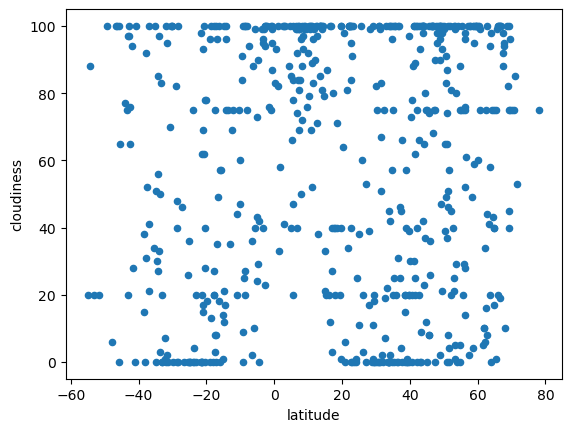

In [87]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.xlabel("latitude")
plt.ylabel("cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
#plt.show()

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'wind speed')

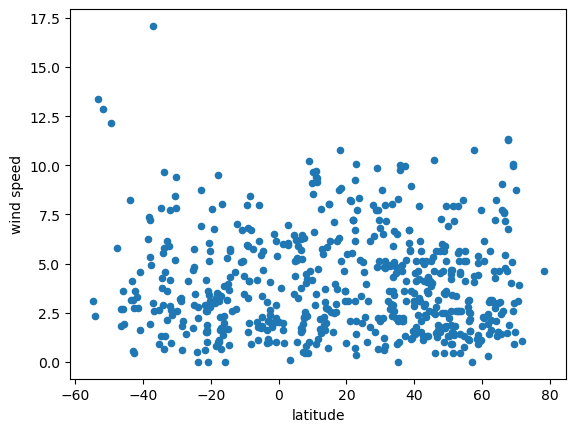

In [88]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.xlabel("latitude")
plt.ylabel("wind speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
#plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Define a function to create Linear Regression plots

reg = np.polyfit(df["var1"], df["var2"], deg=1)

trend = np.polyval(reg, df["var1"]) \
plt.scatter(df["var1"],df["var2"]) \
plt.plot(df["var1"], trend, 'r'); \
plt.xlabel("var1") \
plt.ylabel("var2")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,lagonoy,13.7342,123.5207,299.32,88,100,1.62,PH,1686848767
3,fort bragg,35.1390,-79.0060,303.05,48,75,2.06,US,1686848672
4,mankera,31.3866,71.4407,311.49,28,51,5.14,PK,1686848768
5,ust-nera,64.5667,143.2000,283.24,80,43,1.30,RU,1686848768
8,gadzhiyevo,69.2551,33.3362,279.68,63,40,10.09,RU,1686848769


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,279.61,76,100,2.68,NZ,1686848767
2,maumere,-8.6199,122.2111,297.06,79,100,1.98,ID,1686848767
6,blackmans bay,-43.0167,147.3167,279.55,86,97,3.13,AU,1686848768
7,port-aux-francais,-49.3500,70.2167,279.27,96,100,12.16,TF,1686848768
9,east london,-33.0153,27.9116,287.67,82,0,3.60,ZA,1686848769


###  Temperature vs. Latitude Linear Regression Plot

In [47]:
# Linear regression on Northern Hemisphere
reg = np.polyfit(north_hem_df["Max Temp"], north_hem_df["Lat"], deg=1)
reg

array([ -1.52514161, 487.35217843])

Text(0, 0.5, 'Latitude')

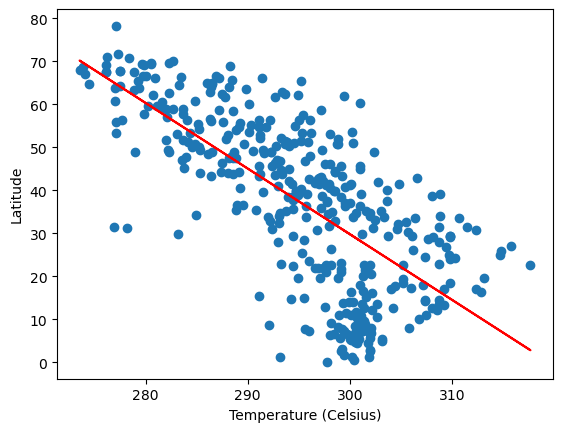

In [51]:
trend = np.polyval(reg, north_hem_df["Max Temp"])
plt.scatter(north_hem_df["Max Temp"],north_hem_df["Lat"])
plt.plot(north_hem_df["Max Temp"], trend, 'r');
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Latitude")

In [53]:
# Linear regression on Southern Hemisphere
reg = np.polyfit(south_hem_df["Max Temp"], south_hem_df["Lat"], deg=1)
reg

array([   1.45097936, -445.4232909 ])

Text(0, 0.5, 'Latitude')

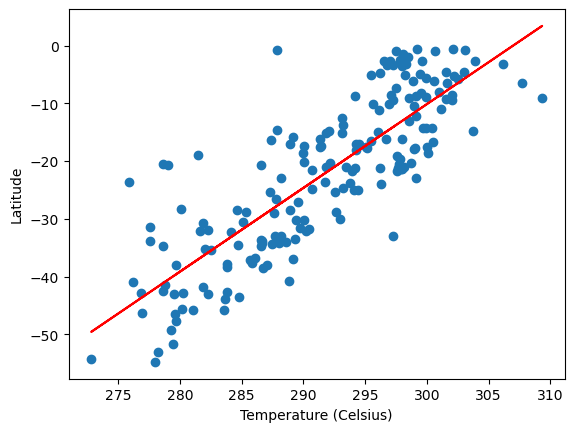

In [54]:
trend = np.polyval(reg, south_hem_df["Max Temp"])
plt.scatter(south_hem_df["Max Temp"],south_hem_df["Lat"])
plt.plot(south_hem_df["Max Temp"], trend, 'r');
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** \
There does not seem to be much correlation between Latitude and Humidity

### Humidity vs. Latitude Linear Regression Plot

#reg = np.polyfit(df["var1"], df["var2"], deg=1)

#trend = np.polyval(reg, df["var1"])
#plt.scatter(df["var1"],df["var2"])
#plt.plot(df["var1"], trend, 'r');
#plt.xlabel("var1")
#plt.ylabel("var2")

In [79]:
# Northern Hemisphere
reg = np.polyfit(north_hem_df["Humidity"], north_hem_df["Lat"], deg=1)
reg

array([-3.28864428e-02,  3.94461299e+01])

Text(0, 0.5, 'Latitude')

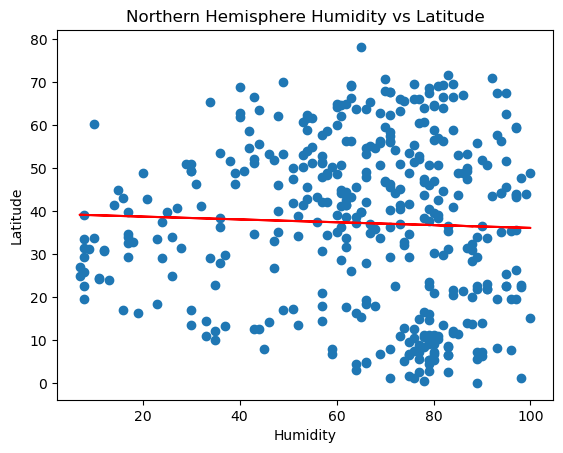

In [80]:
trend = np.polyval(reg, north_hem_df["Humidity"])
plt.scatter(north_hem_df["Humidity"],north_hem_df["Lat"])
plt.plot(north_hem_df["Humidity"], trend, 'r');
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

In [77]:
# Southern Hemisphere
reg = np.polyfit(south_hem_df["Humidity"], south_hem_df["Lat"], deg=1)
reg

array([-1.54734147e-02, -2.10897141e+01])

Text(0, 0.5, 'Latitude')

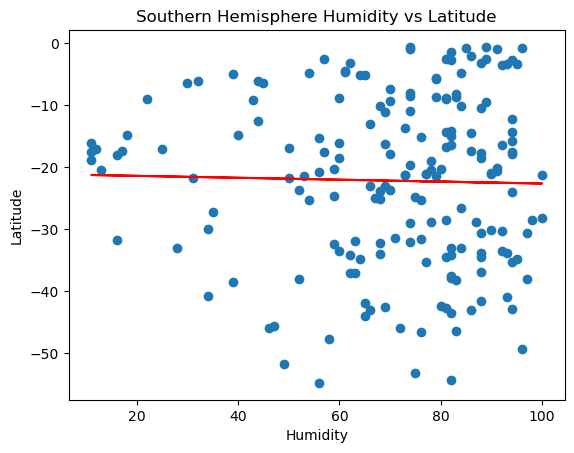

In [78]:
trend = np.polyval(reg, south_hem_df["Humidity"])
plt.scatter(south_hem_df["Humidity"],south_hem_df["Lat"])
plt.plot(south_hem_df["Humidity"], trend, 'r');
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** \
There does not seem to be much correlation between Cloudiness and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

In [73]:
# Northern Hemisphere
reg = np.polyfit(north_hem_df["Cloudiness"], north_hem_df["Lat"], deg=1)
reg

array([-0.04537742, 40.06796231])

Text(0, 0.5, 'Latitude')

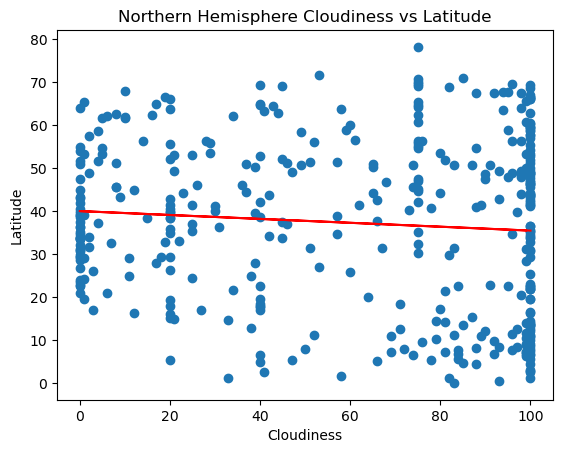

In [74]:
trend = np.polyval(reg, north_hem_df["Cloudiness"])
plt.scatter(north_hem_df["Cloudiness"],north_hem_df["Lat"])
plt.plot(north_hem_df["Cloudiness"], trend, 'r');
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

In [75]:
reg = np.polyfit(south_hem_df["Cloudiness"], south_hem_df["Lat"], deg=1)
reg

array([  0.04516164, -24.44298014])

Text(0, 0.5, 'Latitude')

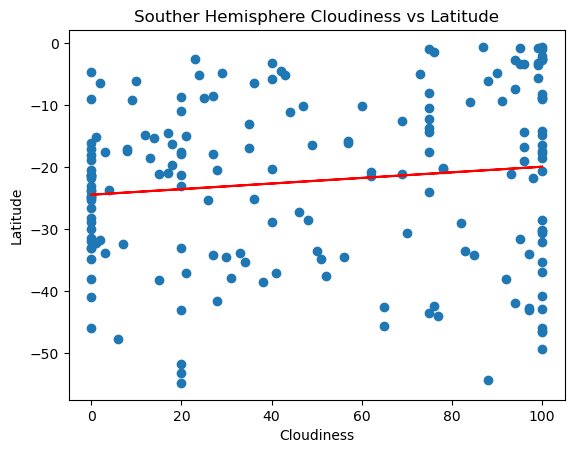

In [76]:
# Southern Hemisphere
trend = np.polyval(reg, south_hem_df["Cloudiness"])
plt.scatter(south_hem_df["Cloudiness"],south_hem_df["Lat"])
plt.plot(south_hem_df["Cloudiness"], trend, 'r');
plt.title("Souther Hemisphere Cloudiness vs Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** \
There is a stronger possitive correlation between Wind Speed and Latitude in the Southern Hemisphere, although that is most likely due to outlying data

### Wind Speed vs. Latitude Linear Regression Plot

In [81]:
# Northern Hemisphere
reg = np.polyfit(north_hem_df["Wind Speed"], north_hem_df["Lat"], deg=1)
reg

array([-0.6442608 , 39.92617423])

Text(0, 0.5, 'Latitude')

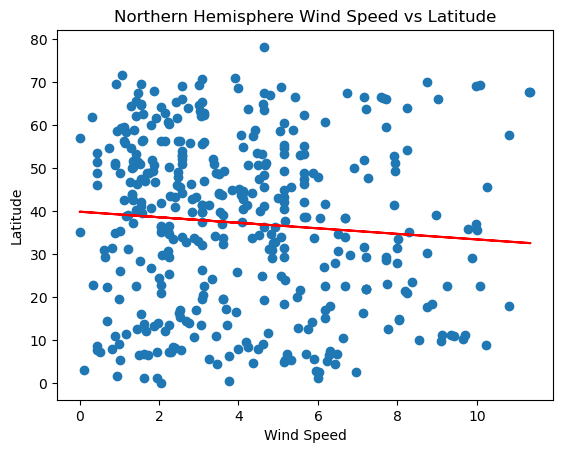

In [82]:
trend = np.polyval(reg, north_hem_df["Wind Speed"])
plt.scatter(north_hem_df["Wind Speed"],north_hem_df["Lat"])
plt.plot(north_hem_df["Wind Speed"], trend, 'r');
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

In [67]:
# Southern Hemisphere
reg = np.polyfit(south_hem_df["Wind Speed"], south_hem_df["Lat"], deg=1)
reg

array([ -0.85001066, -18.92604781])

Text(0, 0.5, 'Latitude')

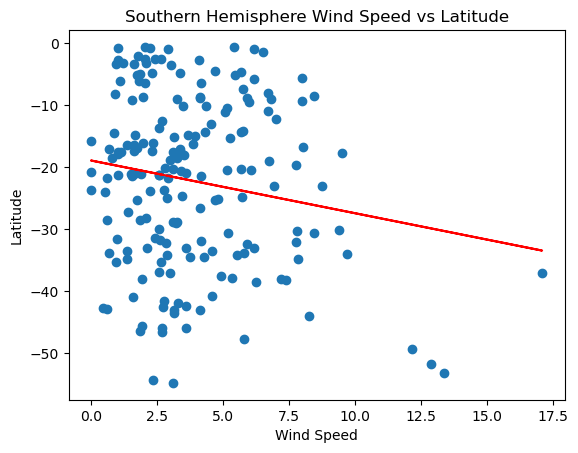

In [69]:
trend = np.polyval(reg, south_hem_df["Wind Speed"])
plt.scatter(south_hem_df["Wind Speed"],south_hem_df["Lat"])
plt.plot(south_hem_df["Wind Speed"], trend, 'r');
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE